In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## contoh mengganti nama column

In [72]:
job_country = "Indonesia"
job_title_short = "Data Analyst"

df_first = df[(df['job_title_short'] == job_title_short) & (df['job_country'] == job_country)].copy()
df_first = df_first.dropna(subset=['salary_year_avg'])

df_exploded = df_first.explode('job_skills')

# df_exploded[['salary_year_avg', 'job_skills']]
df_grouped = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_grouped = df_grouped.rename(columns={'count':'skill_count', 'median': 'median_salary'})

df_job_count = len(df_first)

df_grouped['skill_percent'] = df_grouped['skill_count'] / df_job_count * 100

# filtering more than 5% 
# skill_min_percent = 5
# df_high_demand = df_grouped[df_grouped['skill_percent'] > skill_min_percent]

# filtering top 10
df_high_demand = df_grouped.head(10)

In [73]:
df_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,9,100500.00,69.230769
python,8,76042.50,61.538462
excel,6,89758.75,46.153846
r,3,75067.50,23.076923
bigquery,3,57500.00,23.076923
tableau,3,105000.00,23.076923
asana,1,57500.00,7.692308
aws,1,77017.50,7.692308
gitlab,1,57500.00,7.692308


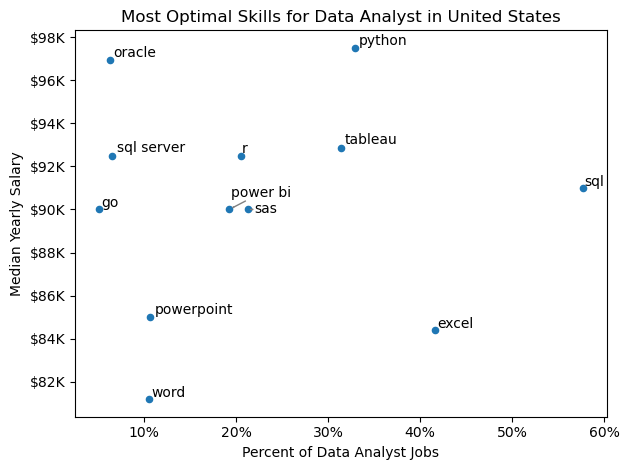

In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.xlabel(f"Percent of {job_title_short} Jobs")
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for {job_title_short} in {job_country}')

texts = []

for i, txt in enumerate(df_high_demand.index):
  texts.append(plt.text(df_high_demand['skill_percent'].iloc[i], df_high_demand['median_salary'].iloc[i], txt))

ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
plt.tight_layout()
plt.show()

In [74]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
  row_dict = ast.literal_eval(row) # convert string to dictionary
  for key, value in row_dict.items():
    if key in technology_dict: # if key does exist in technology_dict, add value to existing key
      technology_dict[key] += value
    else : # if key does not exist in technology_dict, add key and value
      technology_dict[key] = value
      
# most value is duplicated
# removing duplicates value by converting to set and back to list (the value, not the whole technology_dict)
for key, value in technology_dict.items():
  technology_dict[key] = list(set(value))
  
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,sap
0,analyst_tools,outlook
0,analyst_tools,visio
0,analyst_tools,word
...,...,...
9,sync,zoom
9,sync,symphony
9,sync,ringcentral
9,sync,twilio


In [75]:
df_plot = df_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,9,100500.00,69.230769,programming,sql
1,8,76042.50,61.538462,programming,python
2,6,89758.75,46.153846,analyst_tools,excel
3,3,75067.50,23.076923,programming,r
4,3,57500.00,23.076923,cloud,bigquery
5,3,105000.00,23.076923,analyst_tools,tableau
6,1,57500.00,7.692308,async,asana
7,1,77017.50,7.692308,cloud,aws
8,1,57500.00,7.692308,other,gitlab
9,1,132500.00,7.692308,analyst_tools,power bi


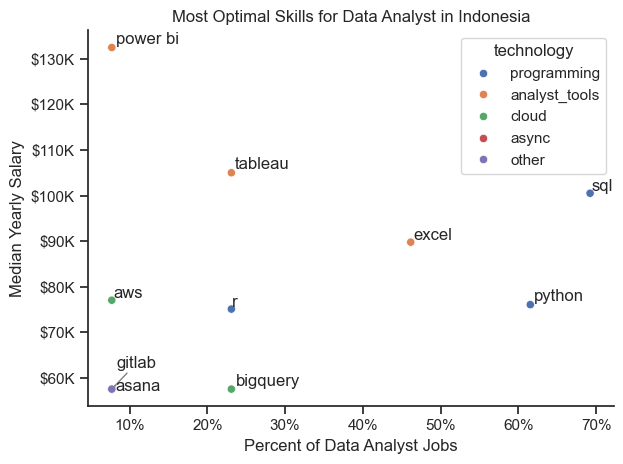

In [76]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
  data=df_plot,
  x='skill_percent',
  y='median_salary',
  hue='technology'
)


plt.xlabel(f"Percent of {job_title_short} Jobs")
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for {job_title_short} in {job_country}')

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_high_demand.index):
  texts.append(plt.text(df_high_demand['skill_percent'].iloc[i], df_high_demand['median_salary'].iloc[i], txt))

ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
plt.tight_layout()
plt.show()